# Evaluation of Information Retrieval Models

In this lab, we evaluate three IR models: **Boolean Retrieval**, **TF-IDF (Cosine Similarity)**, and **KL Divergence**.  
We calculate **Precision**, **Recall**, and **F1-score** for each model using a set of assumed relevant documents.  

This helps us understand how accurately each model retrieves the correct documents and the trade-off between precision and recall.


In [1]:
# Sample retrieved documents for each IR model
retrieved_boolean = [2, 3, 5, 6, 8]
retrieved_tfidf   = [1, 2, 4, 5, 7, 9]
retrieved_kl      = [1, 3, 4, 6, 7, 10]

# Assumed relevant documents for the query
relevant_docs = {1, 3, 5, 7, 9}

print("Assumed relevant documents:", relevant_docs)
print("Retrieved documents by each model:")
print("Boolean Retrieval:", retrieved_boolean)
print("TF-IDF Cosine:", retrieved_tfidf)
print("KL Divergence:", retrieved_kl)


Assumed relevant documents: {1, 3, 5, 7, 9}
Retrieved documents by each model:
Boolean Retrieval: [2, 3, 5, 6, 8]
TF-IDF Cosine: [1, 2, 4, 5, 7, 9]
KL Divergence: [1, 3, 4, 6, 7, 10]


## Evaluation Function

We define a function `compute_metrics` that calculates **Precision**, **Recall**, and **F1-score**.  

- **Precision** measures the proportion of retrieved documents that are relevant.  
- **Recall** measures the proportion of relevant documents that are retrieved.  
- **F1-score** is the harmonic mean of Precision and Recall.


In [5]:
def compute_metrics(retrieved, relevant):
    retrieved_set = set(retrieved)
    relevant_set = set(relevant)
    
    true_positives = len(retrieved_set & relevant_set)
    false_positives = len(retrieved_set - relevant_set)
    false_negatives = len(relevant_set - retrieved_set)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
    
    return precision, recall, f1_score


## Evaluation of IR Models

Now, we use the `compute_metrics` function to evaluate each IR model and display their Precision, Recall, and F1-score.


In [6]:
# Dictionary of IR models and their retrieved results
models = {
    "Boolean Retrieval": retrieved_boolean,
    "TF-IDF Cosine": retrieved_tfidf,
    "KL Divergence": retrieved_kl
}

print("\nEvaluation of IR Models:\n")
precisions, recalls, f1_scores = [], [], []

for model_name, retrieved_docs in models.items():
    p, r, f1 = compute_metrics(retrieved_docs, relevant_docs)
    precisions.append(p)
    recalls.append(r)
    f1_scores.append(f1)
    print(f"{model_name} -> Precision = {p:.2f}, Recall = {r:.2f}, F1-score = {f1:.2f}")



Evaluation of IR Models:

Boolean Retrieval -> Precision = 0.40, Recall = 0.40, F1-score = 0.40
TF-IDF Cosine -> Precision = 0.67, Recall = 0.80, F1-score = 0.73
KL Divergence -> Precision = 0.50, Recall = 0.60, F1-score = 0.55


## Visualization of Metrics

We can visualize Precision, Recall, and F1-score for each IR model using a bar chart to compare their performance easily.


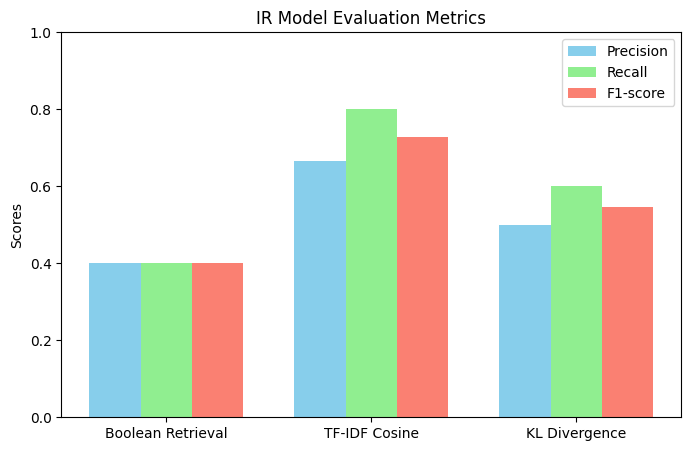

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width, precisions, width, label='Precision', color='skyblue')
ax.bar(x, recalls, width, label='Recall', color='lightgreen')
ax.bar(x + width, f1_scores, width, label='F1-score', color='salmon')

ax.set_xticks(x)
ax.set_xticklabels(models.keys())
ax.set_ylim(0, 1)
ax.set_ylabel('Scores')
ax.set_title('IR Model Evaluation Metrics')
ax.legend()
plt.show()
